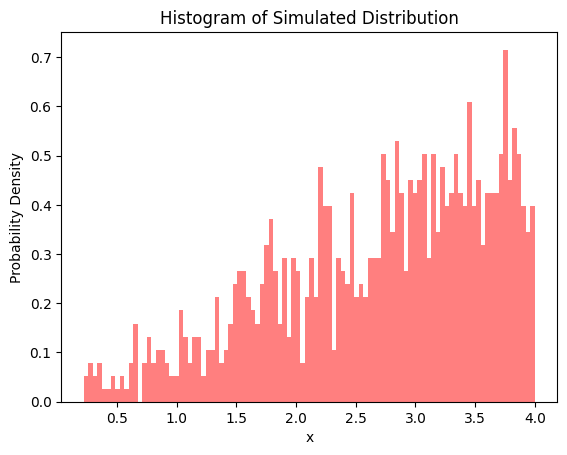

In [9]:
#HW2 Problem 1

import numpy as np
import matplotlib.pyplot as plt

# Set parameter a
a = 4

# Generate uniform random samples
u = np.random.rand(1000)

# Apply inverse CDF: x = a * sqrt(u)
x = a * np.sqrt(u)

# Plot
plt.hist(x, bins=100, density=True, color="red", alpha=0.5)
plt.xlabel("x")
plt.ylabel("Probability Density")
plt.title("Histogram of Simulated Distribution")
plt.show()

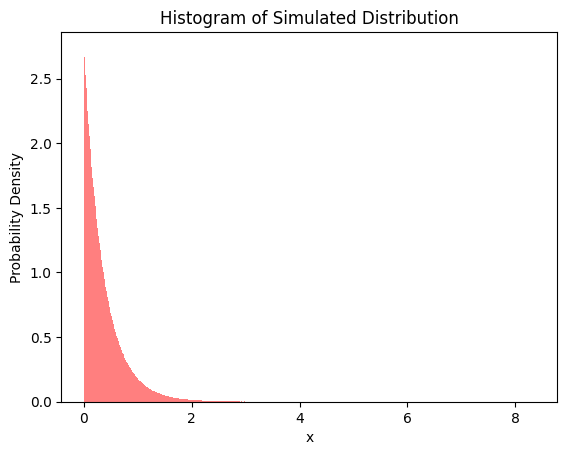

In [12]:
#HW2 Problem 2

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Composition sampling
def mix_exponential(w, dist, n):
    """
    Try help(mix_exponential) at runtime to display docstring
    """
    m = len(w)
    index = np.random.choice(m, size=n, p=w)   # categorical random variable
    sample = np.zeros(n)   # sample each component
    for i in range(m):
        k = np.where(index == i)   # k is array
        sample[k] = dist[i].rvs(size=len(k[0]))
    return sample

# Sample mixture normal
w = [0.25, 0.75]
dist = [stats.expon(scale=1/2), stats.expon(scale=1/3)]
sample = mix_exponential(w, dist, 10000000)

# Plot
plt.hist(sample, bins=1000, density=True, color="red", alpha=0.5)
plt.xlabel("x")
plt.ylabel("Probability Density")
plt.title("Histogram of Simulated Distribution")
plt.show()

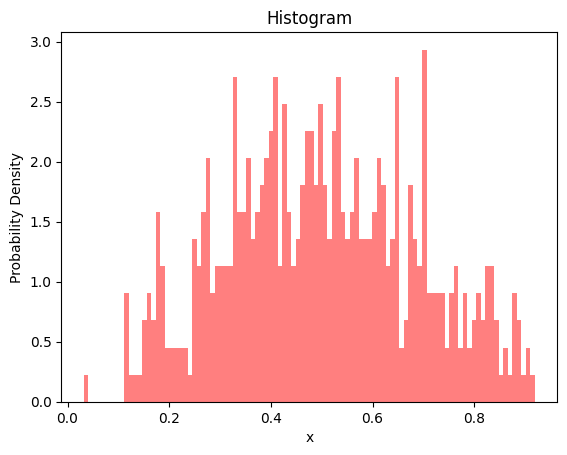

Sample mean: 0.4996254654115793
Sample variance: 0.035416819475811136
True mean: 0.5
True variance: 0.03571428571428571


In [ ]:
#HW2 Problem 3

# Accept-reject sampling
def target(x):
    return stats.beta.pdf(x, a=3, b=3)

def proposal(x):
    return stats.uniform.pdf(x)

def accept_reject(target, proposal, c, n):
    sample = []
    while len(sample) < n:
        x = np.random.uniform(0, 1)
        u = np.random.uniform(0, 1)
        if u <= target(x) / (proposal(x)*c):
            sample.append(x)
    return np.array(sample)

# Sample beta
c = target(0.5) / proposal(0.5)
sample = accept_reject(target, proposal, c, 500)

# Plot
plt.hist(sample, bins=100, density=True, color="red", alpha=0.5)
plt.xlabel("x")
plt.ylabel("Probability Density")
plt.title("Histogram")
plt.show()

print("Sample mean:", np.mean(sample))
print("Sample variance:", np.var(sample))

true_mean = 3 / (3 + 3)
true_var = (3 * 3) / ( (3 + 3)**2 * (3 + 3 + 1) )

print("True mean:", true_mean)
print("True variance:", true_var)

